In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
file_path = 'data/lendingclub_cleaned.csv' 
df_cleaned = pd.read_csv(file_path)


In [4]:
# Split the data into training and testing sets
X = df_cleaned.drop(columns=['default','loan_status'])
y = df_cleaned['default']

splite into training data , test data , validation data

In [5]:
# 20% of the data will be used for testing
X_train_val, X_test, y_train_val, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)
# 80% of the training data will be used for training and 30% for validation
X_train, X_val, y_train, y_val = train_test_split( X_train_val, y_train_val, test_size=0.3, stratify=y_train_val, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Train: (766956, 95), Validation: (328696, 95), Test: (273914, 95)


SMOTE

In [6]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [7]:
columns_to_drop = [
   'funded_amnt', 
'funded_amnt',
 'installment',
  'fico_range_high',
   'out_prncp_inv',
    'total_pymnt',
     'total_pymnt_inv', 
     'total_rec_prncp', 
     'collection_recovery_fee'
     , 'num_rev_tl_bal_gt_0',
     
      'num_sats',
       'percent_bc_gt_75',
'funded_amnt_inv'
]
X_train = X_train.drop(columns=columns_to_drop)

correlation_matrix = pd.DataFrame(X_train).corr().abs()
high_correlation = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            high_correlation.add(colname)
print("High correlation features:", high_correlation)


upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))


high_corr_pairs = [(col, row, upper.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if abs(upper.loc[row, col]) > 0.80]


for f1, f2, corr_val in high_corr_pairs:
    print(f"{f1} vs {f2} --> correlation = {corr_val:.2f}")
print(X_train.columns.tolist())

X_val = X_val[X_train.columns]
X_test = X_test[X_train.columns]



High correlation features: set()
last_fico_range_low vs last_fico_range_high --> correlation = 0.83
avg_cur_bal vs tot_cur_bal --> correlation = 0.84
bc_util vs revol_util --> correlation = 0.83
num_actv_rev_tl vs num_actv_bc_tl --> correlation = 0.81
num_bc_sats vs num_actv_bc_tl --> correlation = 0.83
num_op_rev_tl vs open_acc --> correlation = 0.82
num_rev_accts vs num_bc_tl --> correlation = 0.84
['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m

standardscale

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [9]:
selected_features = X_train.columns
# 3rd step: Convert the scaled arrays back to DataFrames with the original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_val_scaled_df   = pd.DataFrame(X_val_scaled, columns=selected_features)
X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns=selected_features)


In [10]:

upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))


high_corr_pairs = [(col, row, upper.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if abs(upper.loc[row, col]) > 0.85]

# 打印这些高相关的特征对
for f1, f2, corr_val in high_corr_pairs:
    print(f"{f1} vs {f2} --> correlation = {corr_val:.2f}")


In [11]:
columns_to_drop = [
    'num_rev_tl_bal_gt_0',
    'installment',
    'funded_amnt_inv',
    'funded_amnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'out_prncp_inv',
    'fico_range_low'
]

final_features = [f for f in selected_features if f not in columns_to_drop]
print("Removed due to high correlation:", columns_to_drop)
print("Remaining features for model:", final_features)

Removed due to high correlation: ['num_rev_tl_bal_gt_0', 'installment', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_rec_prncp', 'out_prncp_inv', 'fico_range_low']
Remaining features for model: ['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_o

model training

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report
)
import matplotlib.pyplot as plt

In [13]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression model
model = LogisticRegression(class_weight='balanced', penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_val = model.predict(X_val_scaled)
y_prob_val = model.predict_proba(X_val_scaled)[:, 1]  # probabilities for the positive class

# Evaluation metrics
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, zero_division=0)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
auc = roc_auc_score(y_val, y_prob_val)

# Print results
print("Logistic Regression Performance Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))

# test set evaluation
y_pred_test = model.predict(X_test_scaled)
y_prob_test = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, zero_division=0)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_prob_test)

print("\nTest Set Performance Metrics:")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"AUC-ROC:   {test_auc:.4f}")

# # Plot ROC Curve
# fpr, tpr, _ = roc_curve(y_val, y_prob_val)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate (Recall)')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Performance Metrics:
Accuracy:  0.9603
Precision: 0.8642
Recall:    0.9644
F1-Score:  0.9116
AUC-ROC:   0.9931

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97    258898
         1.0       0.86      0.96      0.91     69798

    accuracy                           0.96    328696
   macro avg       0.93      0.96      0.94    328696
weighted avg       0.96      0.96      0.96    328696


Test Set Performance Metrics:
Accuracy:  0.9604
Precision: 0.8652
Recall:    0.9639
F1-Score:  0.9119
AUC-ROC:   0.9930


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 
dt_model = DecisionTreeClassifier(max_depth=7, min_samples_split=15, class_weight='balanced')
dt_model.fit(X_train_scaled, y_train)

# 2. 模型预测
y_pred_dt_val = dt_model.predict(X_val_scaled)  # Use X_val_scaled for predictions
y_pred_proba_dt_val = dt_model.predict_proba(X_val_scaled)[:, 1]  # Use X_test for probabilities


# 3. 模型评估指标
accuracy_dt = accuracy_score(y_val, y_pred_dt_val)
precision_dt = precision_score(y_val, y_pred_dt_val)
recall_dt = recall_score(y_val, y_pred_dt_val)
f1_dt = f1_score(y_val, y_pred_dt_val)
auc_dt = roc_auc_score(y_val, y_pred_proba_dt_val)

# 4. 打印结果
print("Decision Tree Performance Metrics:")
print(f"Accuracy:  {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall:    {recall_dt:.4f}")
print(f"F1-Score:  {f1_dt:.4f}")
print(f"AUC-ROC:   {auc_dt:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt_val))

# # 5. 绘制 ROC 曲线
# fpr_dt, tpr_dt, _ = roc_curve(y_val, y_pred_proba_dt_val)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})', color='green')
# plt.plot([0, 1], [0, 1], 'k--', lw=1)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Decision Tree')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

# # 6. 测试集评估
y_pred_dt_test = dt_model.predict(X_test_scaled)  # Use X_test_scaled for predictions
y_pred_proba_dt_test = dt_model.predict_proba(X_test_scaled)[:, 1]  # Use X_test for probabilities
# 测试集评估指标
test_accuracy_dt = accuracy_score(y_test, y_pred_dt_test)
test_precision_dt = precision_score(y_test, y_pred_dt_test)
test_recall_dt = recall_score(y_test, y_pred_dt_test)
test_f1_dt = f1_score(y_test, y_pred_dt_test)
test_auc_dt = roc_auc_score(y_test, y_pred_proba_dt_test)
print("\nDecision Tree Test Set Performance Metrics:")
print(f"Accuracy:  {test_accuracy_dt:.4f}")
print(f"Precision: {test_precision_dt:.4f}")
print(f"Recall:    {test_recall_dt:.4f}")
print(f"F1-Score:  {test_f1_dt:.4f}")
print(f"AUC-ROC:   {test_auc_dt:.4f}")



Decision Tree Performance Metrics:
Accuracy:  0.9754
Precision: 0.9303
Recall:    0.9557
F1-Score:  0.9428
AUC-ROC:   0.9953

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    258898
         1.0       0.93      0.96      0.94     69798

    accuracy                           0.98    328696
   macro avg       0.96      0.97      0.96    328696
weighted avg       0.98      0.98      0.98    328696


Decision Tree Test Set Performance Metrics:
Accuracy:  0.9752
Precision: 0.9308
Recall:    0.9541
F1-Score:  0.9423
AUC-ROC:   0.9952


In [15]:
# xgboost
# 1. XGBoost 模型训练
from xgboost import XGBClassifier
xgb_model = XGBClassifier( eval_metric='auc')
xgb_model.fit(X_train_scaled, y_train)
# 2. 模型预测
y_pred_xgb_val = xgb_model.predict(X_val_scaled)
y_pred_proba_xgb_val = xgb_model.predict_proba(X_val_scaled)[:, 1]
# 3. 模型评估指标
accuracy_xgb = accuracy_score(y_val, y_pred_xgb_val)
precision_xgb = precision_score(y_val, y_pred_xgb_val)
recall_xgb = recall_score(y_val, y_pred_xgb_val)
f1_xgb = f1_score(y_val, y_pred_xgb_val)
auc_xgb = roc_auc_score(y_val, y_pred_proba_xgb_val)
# 4. 打印结果
print("XGBoost Performance Metrics:")
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")
print(f"AUC-ROC:   {auc_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_xgb_val))
# # 5. 绘制 ROC 曲线
# fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_pred_proba_xgb_val)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})', color='orange')
# plt.plot([0, 1], [0, 1], 'k--', lw=1)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - XGBoost')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

# 6. 测试集评估
y_pred_xgb_test = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb_test = xgb_model.predict_proba(X_test_scaled)[:, 1]
# 测试集评估指标
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb_test)
test_precision_xgb = precision_score(y_test, y_pred_xgb_test)
test_recall_xgb = recall_score(y_test, y_pred_xgb_test)
test_f1_xgb = f1_score(y_test, y_pred_xgb_test)
test_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb_test)
print("\nXGBoost Test Set Performance Metrics:")
print(f"Accuracy:  {test_accuracy_xgb:.4f}")
print(f"Precision: {test_precision_xgb:.4f}")
print(f"Recall:    {test_recall_xgb:.4f}")
print(f"F1-Score:  {test_f1_xgb:.4f}")
print(f"AUC-ROC:   {test_auc_xgb:.4f}")


XGBoost Performance Metrics:
Accuracy:  0.9935
Precision: 0.9876
Recall:    0.9816
F1-Score:  0.9846
AUC-ROC:   0.9995

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    258898
         1.0       0.99      0.98      0.98     69798

    accuracy                           0.99    328696
   macro avg       0.99      0.99      0.99    328696
weighted avg       0.99      0.99      0.99    328696


XGBoost Test Set Performance Metrics:
Accuracy:  0.9936
Precision: 0.9882
Recall:    0.9818
F1-Score:  0.9850
AUC-ROC:   0.9996


In [16]:
# # svm
# from sklearn.svm import SVC
# # 1. SVM 模型训练
# svm_model = SVC(probability=True, random_state=42, class_weight='balanced')
# # 只选取5%的数据进行训练以加快速度
# X_train_sampled, y_train_sampled = X_train_scaled[:int(0.05 * len(X_train_scaled))], y_train[:int(0.05 * len(y_train))]
# svm_model.fit(X_train_sampled, y_train_sampled)

# # 2. 模型预测
# y_pred_svm_val = svm_model.predict(X_val_scaled)
# y_pred_proba_svm_val = svm_model.predict_proba(X_val_scaled)[:, 1]
# # 3. 模型评估指标
# accuracy_svm = accuracy_score(y_val, y_pred_svm_val)
# precision_svm = precision_score(y_val, y_pred_svm_val, average='macro')  # Fixed average parameter
# recall_svm = recall_score(y_val, y_pred_svm_val, average='macro')        # Fixed average parameter
# f1_svm = f1_score(y_val, y_pred_svm_val, average='macro')                # Fixed average parameter
# auc_svm = roc_auc_score(y_val, y_pred_proba_svm_val, multi_class='ovr')  # Adjusted for multiclass
# # 4. 打印结果
# print("SVM Performance Metrics:")
# print(f"Accuracy:  {accuracy_svm:.4f}")
# print(f"Precision: {precision_svm:.4f}")
# print(f"Recall:    {recall_svm:.4f}")
# print(f"F1-Score:  {f1_svm:.4f}")
# print(f"AUC-ROC:   {auc_svm:.4f}")
# print("\nClassification Report:")
# print(classification_report(y_val, y_pred_svm_val))
# # 5. 绘制 ROC 曲线
# # fpr_svm, tpr_svm, _ = roc_curve(y_val, y_pred_proba_svm_val)
# # plt.figure(figsize=(8, 6))
# # plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.4f})', color='purple')
# # plt.plot([0, 1], [0, 1], 'k--', lw=1)
# # plt.xlabel('False Positive Rate')
# # plt.ylabel('True Positive Rate')
# # plt.title('ROC Curve - SVM')
# # plt.legend(loc='lower right')
# # plt.grid(True)
# # plt.show()

# # 6. 测试集评估
# y_pred_svm_test = svm_model.predict(X_test_scaled)
# y_pred_proba_svm_test = svm_model.predict_proba(X_test_scaled)[:, 1]
# # 测试集评估指标
# test_accuracy_svm = accuracy_score(y_test, y_pred_svm_test)
# test_precision_svm = precision_score(y_test, y_pred_svm_test, average='macro')  # Fixed average parameter
# test_recall_svm = recall_score(y_test, y_pred_svm_test, average='macro')        # Fixed average parameter
# test_f1_svm = f1_score(y_test, y_pred_svm_test, average='macro')                # Fixed average parameter
# test_auc_svm = roc_auc_score(y_test, y_pred_proba_svm_test, multi_class='ovr')  # Adjusted for multiclass
# print("\nSVM Test Set Performance Metrics:")
# print(f"Accuracy:  {test_accuracy_svm:.4f}")
# print(f"Precision: {test_precision_svm:.4f}")
# print(f"Recall:    {test_recall_svm:.4f}")
# print(f"F1-Score:  {test_f1_svm:.4f}")
# print(f"AUC-ROC:   {test_auc_svm:.4f}")


In [17]:
# #random forest
# from sklearn.ensemble import RandomForestClassifier
# # 1. 随机森林模型训练
# rf_model = RandomForestClassifier(random_state=42, n_estimators=500, class_weight='balanced', max_depth=8, min_samples_split=15)
# rf_model.fit(X_train_scaled, y_train)
# # 2. 模型预测
# y_pred_rf_val = rf_model.predict(X_val_scaled)
# y_pred_proba_rf_val = rf_model.predict_proba(X_val_scaled)[:, 1]
# # 3. 模型评估指标
# accuracy_rf = accuracy_score(y_val, y_pred_rf_val)
# precision_rf = precision_score(y_val, y_pred_rf_val)
# recall_rf = recall_score(y_val, y_pred_rf_val)
# f1_rf = f1_score(y_val, y_pred_rf_val)
# auc_rf = roc_auc_score(y_val, y_pred_proba_rf_val)
# # 4. 打印结果
# print("Random Forest Performance Metrics:")
# print(f"Accuracy:  {accuracy_rf:.4f}")
# print(f"Precision: {precision_rf:.4f}")
# print(f"Recall:    {recall_rf:.4f}")
# print(f"F1-Score:  {f1_rf:.4f}")
# print(f"AUC-ROC:   {auc_rf:.4f}")
# print("\nClassification Report:")
# print(classification_report(y_val, y_pred_rf_val))
# # # 5. 绘制 ROC 曲线
# # fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_proba_rf_val)
# # plt.figure(figsize=(8, 6))
# # plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', color='brown')
# # plt.plot([0, 1], [0, 1], 'k--', lw=1)
# # plt.xlabel('False Positive Rate')
# # plt.ylabel('True Positive Rate')
# # plt.title('ROC Curve - Random Forest')
# # plt.legend(loc='lower right')
# # plt.grid(True)
# # plt.show()

# # 6. 测试集评估
# y_pred_rf_test = rf_model.predict(X_test_scaled)
# y_pred_proba_rf_test = rf_model.predict_proba(X_test_scaled)[:, 1]
# # 测试集评估指标
# test_accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
# test_precision_rf = precision_score(y_test, y_pred_rf_test)
# test_recall_rf = recall_score(y_test, y_pred_rf_test)
# test_f1_rf = f1_score(y_test, y_pred_rf_test)
# test_auc_rf = roc_auc_score(y_test, y_pred_proba_rf_test)
# print("\nRandom Forest Test Set Performance Metrics:")
# print(f"Accuracy:  {test_accuracy_rf:.4f}")
# print(f"Precision: {test_precision_rf:.4f}")
# print(f"Recall:    {test_recall_rf:.4f}")
# print(f"F1-Score:  {test_f1_rf:.4f}")
# print(f"AUC-ROC:   {test_auc_rf:.4f}")


In [18]:
# # Neural Network
# from sklearn.neural_network import MLPClassifier
# # 1. 神经网络模型训练
# # nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
# # 增加迭代次数和隐藏层大小
# nn_model = MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=1000, random_state=42)

# nn_model.fit(X_train_scaled, y_train)
# # 2. 模型预测
# y_pred_nn_val = nn_model.predict(X_val_scaled)
# y_pred_proba_nn_val = nn_model.predict_proba(X_val_scaled)[:, 1]
# # 3. 模型评估指标
# accuracy_nn = accuracy_score(y_val, y_pred_nn_val)
# precision_nn = precision_score(y_val, y_pred_nn_val)
# recall_nn = recall_score(y_val, y_pred_nn_val)
# f1_nn = f1_score(y_val, y_pred_nn_val)
# auc_nn = roc_auc_score(y_val, y_pred_proba_nn_val)
# # 4. 打印结果
# print("Neural Network Performance Metrics:")
# print(f"Accuracy:  {accuracy_nn:.4f}")
# print(f"Precision: {precision_nn:.4f}")
# print(f"Recall:    {recall_nn:.4f}")
# print(f"F1-Score:  {f1_nn:.4f}")
# print(f"AUC-ROC:   {auc_nn:.4f}")
# print("\nClassification Report:")
# print(classification_report(y_val, y_pred_nn_val))
# # # 5. 绘制 ROC 曲线
# # fpr_nn, tpr_nn, _ = roc_curve(y_val, y_pred_proba_nn_val)
# # plt.figure(figsize=(8, 6))
# # plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.4f})', color='cyan')
# # plt.plot([0, 1], [0, 1], 'k--', lw=1)
# # plt.xlabel('False Positive Rate')
# # plt.ylabel('True Positive Rate')
# # plt.title('ROC Curve - Neural Network')
# # plt.legend(loc='lower right')
# # plt.grid(True)
# # plt.show()

# # 6. 测试集评估
# y_pred_nn_test = nn_model.predict(X_test_scaled)
# y_pred_proba_nn_test = nn_model.predict_proba(X_test_scaled)[:, 1]
# # 测试集评估指标
# test_accuracy_nn = accuracy_score(y_test, y_pred_nn_test)
# test_precision_nn = precision_score(y_test, y_pred_nn_test)
# test_recall_nn = recall_score(y_test, y_pred_nn_test)
# test_f1_nn = f1_score(y_test, y_pred_nn_test)
# test_auc_nn = roc_auc_score(y_test, y_pred_proba_nn_test)
# print("\nNeural Network Test Set Performance Metrics:")
# print(f"Accuracy:  {test_accuracy_nn:.4f}")
# print(f"Precision: {test_precision_nn:.4f}")
# print(f"Recall:    {test_recall_nn:.4f}")
# print(f"F1-Score:  {test_f1_nn:.4f}")
# print(f"AUC-ROC:   {test_auc_nn:.4f}")

In [19]:
# # 模型结果比较
# import pandas as pd
# # 创建一个 DataFrame 来存储各模型的性能指标
# results = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost', 'SVM', 'Random Forest', 'Neural Network'],
#     'Accuracy': [accuracy, accuracy_dt, accuracy_xgb, accuracy_svm, accuracy_rf, accuracy_nn],
#     'Precision': [precision, precision_dt, precision_xgb, precision_svm, precision_rf, precision_nn],
#     'Recall': [recall, recall_dt, recall_xgb, recall_svm, recall_rf, recall_nn],
#     'F1-Score': [f1, f1_dt, f1_xgb, f1_svm, f1_rf, f1_nn],
#     'AUC-ROC': [auc, auc_dt, auc_xgb, auc_svm, auc_rf, auc_nn]
# })
# # 设置模型名称为索引
# results.set_index('Model', inplace=True)
# # 打印结果
# print("\nModel Performance Comparison:")
# print(results)
# # 可视化模型性能比较
# plt.figure(figsize=(12, 8))
# results[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']].plot(kind='bar', rot=45)
# plt.title('Model Performance Comparison')
# plt.ylabel('Score')
# plt.xticks(rotation=45)
# plt.legend(title='Metrics')
# plt.tight_layout()
# # 保存结果到CSV文件
# # results结果保留4位小数
# results = results.round(4)
# # results.to_csv('model_performance_comparison.csv')
# plt.show()

# #汇总六种方法的auc-roc图
# plt.figure(figsize=(10, 8))
# plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.4f})', color='blue')
# plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})', color='green')
# plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})', color='orange')
# plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.4f})', color='purple')
# plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', color='brown')
# plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.4f})', color='cyan')
# plt.plot([0, 1], [0, 1], 'k--', lw=1)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparison of Different Models')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.tight_layout()
# # plt.savefig('roc_curve_comparison.png')


REtest

In [20]:
# # test set evaluation
# results_test = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost', 'SVM', 'Random Forest', 'Neural Network'],
#     'Accuracy': [test_accuracy, test_accuracy_dt, test_accuracy_xgb,test_accuracy_svm, test_accuracy_rf, test_accuracy_nn],
#     'Precision': [test_precision, test_precision_dt, test_precision_xgb, test_precision_svm, test_precision_rf, test_precision_nn],
#     'Recall': [test_recall, test_recall_dt, test_recall_xgb, test_recall_svm, test_recall_rf, test_recall_nn],
#     'F1-Score': [test_f1, test_f1_dt, test_f1_xgb, test_f1_svm, test_f1_rf, test_f1_nn],
#     'AUC-ROC': [test_auc, test_auc_dt, test_auc_xgb, test_auc_svm, test_auc_rf, test_auc_nn]
# })
# # 设置模型名称为索引
# results_test.set_index('Model', inplace=True)
# # 打印结果
# print("\nModel Performance Comparison:")
# print(results_test)
# # 可视化模型性能比较
# plt.figure(figsize=(12, 8))
# results_test[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']].plot(kind='bar', rot=45)
# plt.title('Model Performance Comparison')
# plt.ylabel('Score')
# plt.xticks(rotation=45)
# plt.legend(title='Metrics')
# plt.tight_layout()
# # 保存结果到CSV文件
# # results结果保留4位小数
# results_test = results_test.round(4)
# results.to_csv('model_performance_comparison.csv')
# plt.show()

# #汇总六种方法的auc-roc图
# fpr, tpr, _ = roc_curve(y_test, y_prob_test)
# fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt_test)
# fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb_test)
# fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm_test)
# fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf_test)
# fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn_test)

# plt.figure(figsize=(10, 8))
# plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.4f})', color='blue')
# plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})', color='green')
# plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})', color='orange')
# plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.4f})', color='purple')
# plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', color='brown')
# plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.4f})', color='cyan')
# plt.plot([0, 1], [0, 1], 'k--', lw=1)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparison of Different Models')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('roc_curve_comparison.png')

optimized result

100%|===================| 273686/273914 [11:16<00:00]        

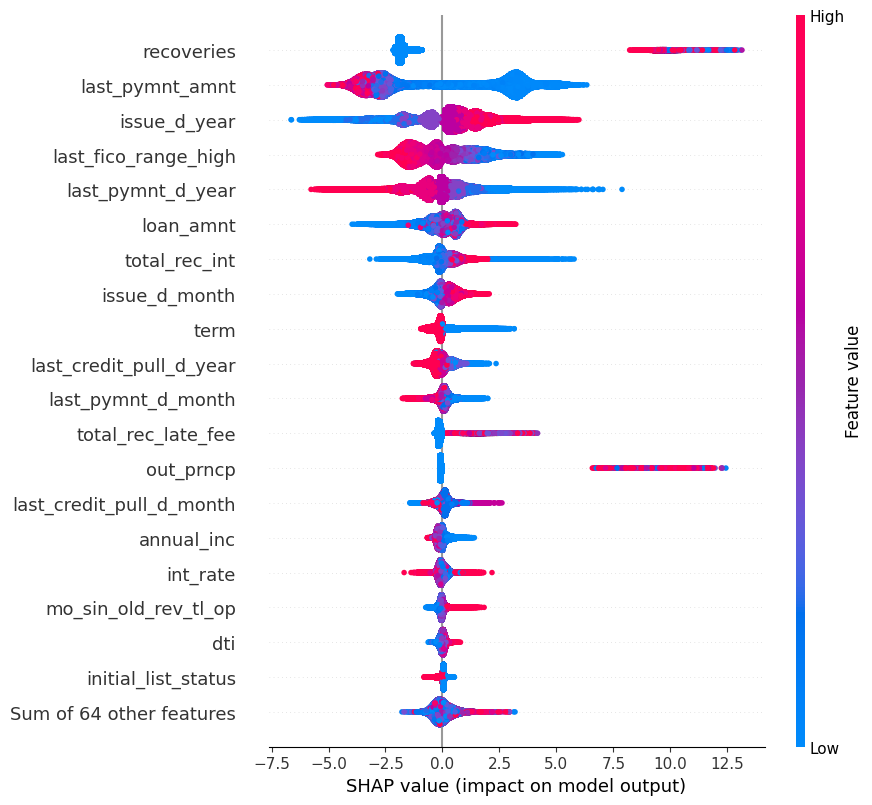

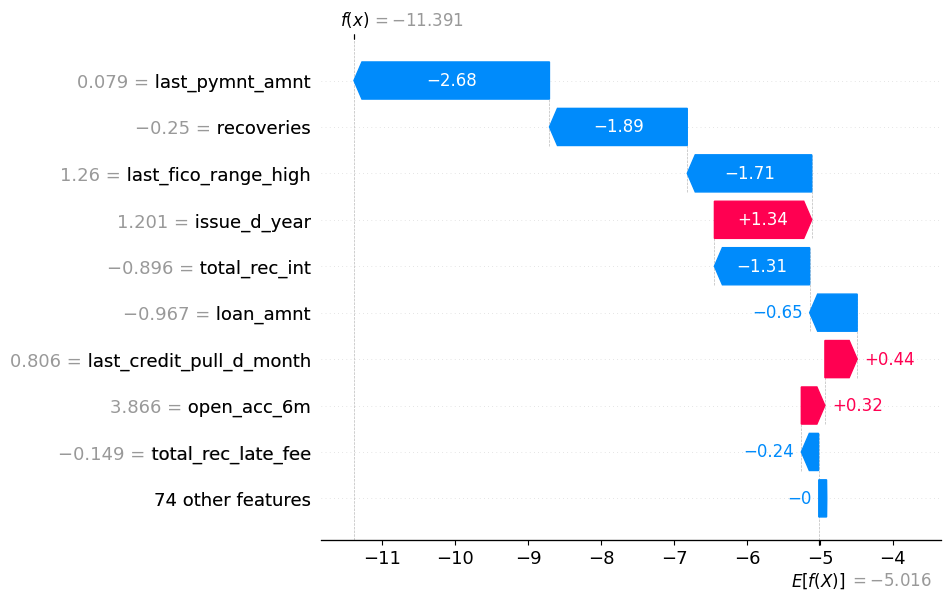

In [21]:
# step 1 train XGBoost model and perform SHAP analysis
from xgboost import XGBClassifier
import shap

# train model
xgb_model = XGBClassifier(eval_metric='auc')
xgb_model.fit(X_train_scaled_df, y_train)

# 2 shap explainer
explainer_xgb = shap.Explainer(xgb_model, X_train_scaled_df)
shap_values_xgb = explainer_xgb(X_test_scaled_df)

# 3. plot global feature importance
shap.plots.beeswarm(shap_values_xgb, max_display=20)

# 4. single sample result（no 5 ）
shap.plots.waterfall(shap_values_xgb[5])



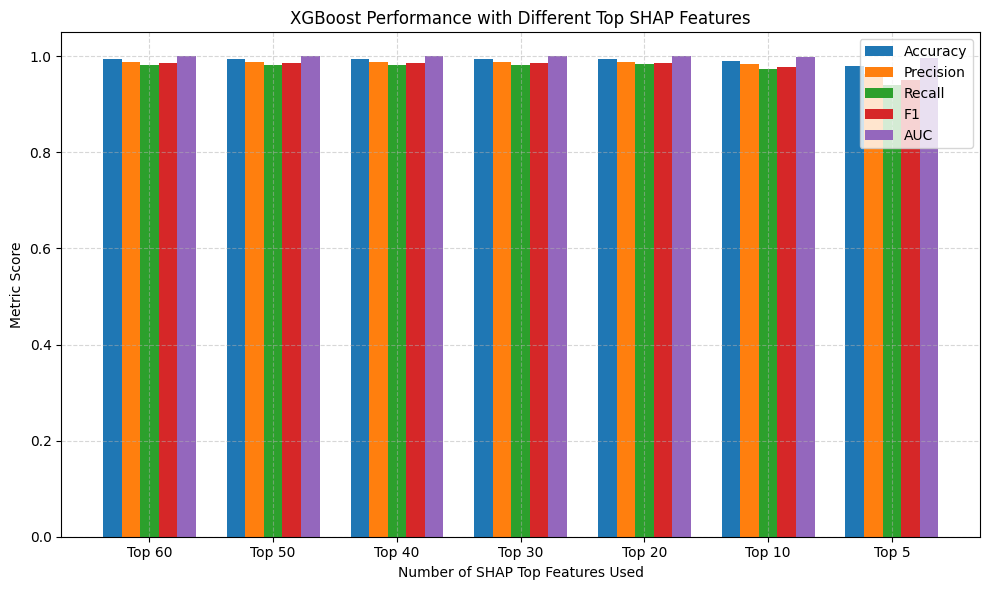

In [22]:
## Evaluate model performance using top k features based on SHAP values
def evaluate_model_with_top_features(top_k, shap_values, X_train_df, X_train_scaled, X_test_scaled, y_train, y_test):
    # calculate mean absolute SHAP values
    shap_array = np.abs(shap_values.values).mean(axis=0)

    
    # gain feature importance order by mean absolute SHAP values
    feature_importance = pd.DataFrame({
        'feature': X_train_df.columns,
        'mean_abs_shap': shap_array
    }).sort_values(by='mean_abs_shap', ascending=False)

    top_features = feature_importance['feature'].head(top_k).tolist()
    indices = [X_train_df.columns.get_loc(f) for f in top_features]
    
    # grab top k features
    X_train_sub = X_train_scaled[:, indices]
    X_test_sub = X_test_scaled[:, indices]

    # train XGBoost model with top features
    model = XGBClassifier(eval_metric='auc')
    model.fit(X_train_sub, y_train)

    # predict
    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    # evaluate metrics
    return {
        'Top': top_k,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }

top_ks = [60,50,40,30,20, 10, 5]
results = []

for k in top_ks:
    result = evaluate_model_with_top_features(
        top_k=k,
        shap_values=shap_values_xgb,  # 来自 SHAP 解释器
        X_train_df=X_train_scaled_df,
        X_train_scaled=X_train_scaled,
        X_test_scaled=X_test_scaled,
        y_train=y_train,
        y_test=y_test
    )
    results.append(result)

results_df = pd.DataFrame(results)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
x = np.arange(len(top_ks))
bar_width = 0.15

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, results_df[metric], width=bar_width, label=metric)

plt.xticks(x + bar_width * 2, [f'Top {k}' for k in top_ks])
plt.ylabel("Metric Score")
plt.xlabel("Number of SHAP Top Features Used")
plt.title("XGBoost Performance with Different Top SHAP Features")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




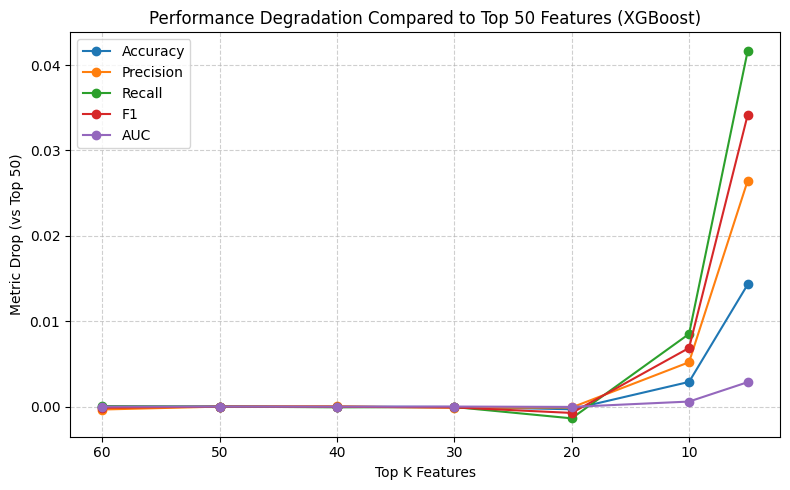

In [23]:
# calculate the performance degradation compared to Top 50 features
baseline = results_df[results_df['Top'] == 50][metrics].values[0]
delta_df = results_df.copy()
for metric in metrics:
    delta_df[metric] = baseline[metrics.index(metric)] - delta_df[metric]

# plot the performance degradation
plt.figure(figsize=(8, 5))
for metric in metrics:
    plt.plot(delta_df['Top'], delta_df[metric], marker='o', label=metric)

plt.xlabel('Top K Features')
plt.ylabel('Metric Drop (vs Top 50)')
plt.title('Performance Degradation Compared to Top 50 Features (XGBoost)')
plt.gca().invert_xaxis()  
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# 画 SHAP 值的重要性累积占比
sorted_shap = feature_importance['mean_abs_shap'].values
cumsum_shap = np.cumsum(sorted_shap) / np.sum(sorted_shap)

plt.figure(figsize=(7, 5))
plt.plot(range(1, len(cumsum_shap)+1), cumsum_shap, marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% coverage')
plt.xlabel('Top K Features')
plt.ylabel('Cumulative SHAP Contribution')
plt.title('Cumulative SHAP Contribution of Features')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'feature_importance' is not defined

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

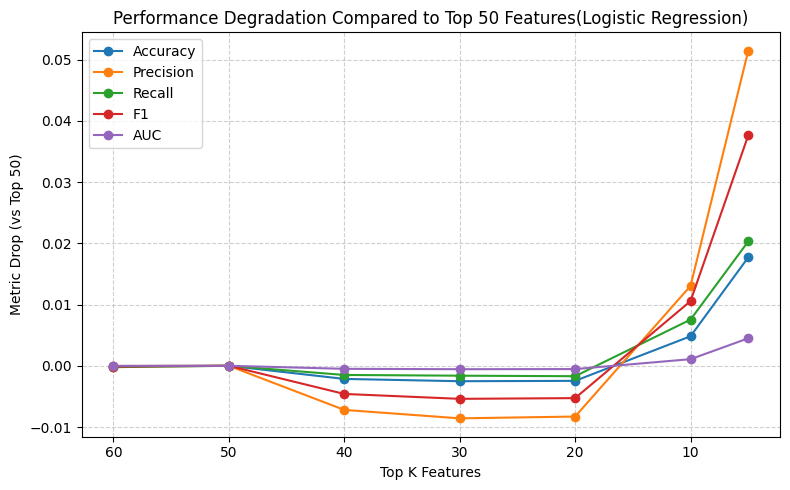

In [22]:

def evaluate_model_with_top_features(top_k, shap_values, X_train_df, X_train_scaled, X_test_scaled, y_train, y_test):
    shap_array = np.abs(shap_values_xgb.values).mean(axis=0)

    feature_importance = pd.DataFrame({
        'feature': X_train_df.columns,
        'mean_abs_shap': shap_array
    }).sort_values(by='mean_abs_shap', ascending=False)

    top_features = feature_importance['feature'].head(top_k).tolist()
    indices = [X_train_df.columns.get_loc(f) for f in top_features]
    
    X_train_sub = X_train_scaled[:, indices]
    X_test_sub = X_test_scaled[:, indices]

    model = LogisticRegression(class_weight='balanced', penalty='elasticnet', solver='saga', l1_ratio=0.5)
    model.fit(X_train_sub, y_train)

    # prediction
    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    return {
        'Top': top_k,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }


top_ks = [60,50,40,30,20, 10, 5]
results_lr = []

for k in top_ks:
    result_lr = evaluate_model_with_top_features(
        top_k=k,
        shap_values=shap_values_xgb, 
        X_train_df=X_train_scaled_df,
        X_train_scaled=X_train_scaled,
        X_test_scaled=X_test_scaled,
        y_train=y_train,
        y_test=y_test
    )
    results_lr.append(result_lr)

results_lr = pd.DataFrame(results_lr)

# calculate the difference from Top 50
baseline = results_lr[results_lr['Top'] == 50][metrics].values[0]
delta_df = results_lr.copy()
for metric in metrics:
    delta_df[metric] = baseline[metrics.index(metric)] - delta_df[metric]

plt.figure(figsize=(8, 5))
for metric in metrics:
    plt.plot(delta_df['Top'], delta_df[metric], marker='o', label=metric)

plt.xlabel('Top K Features')
plt.ylabel('Metric Drop (vs Top 50)')
plt.title('Performance Degradation Compared to Top 50 Features(Logistic Regression)')
plt.gca().invert_xaxis()  
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



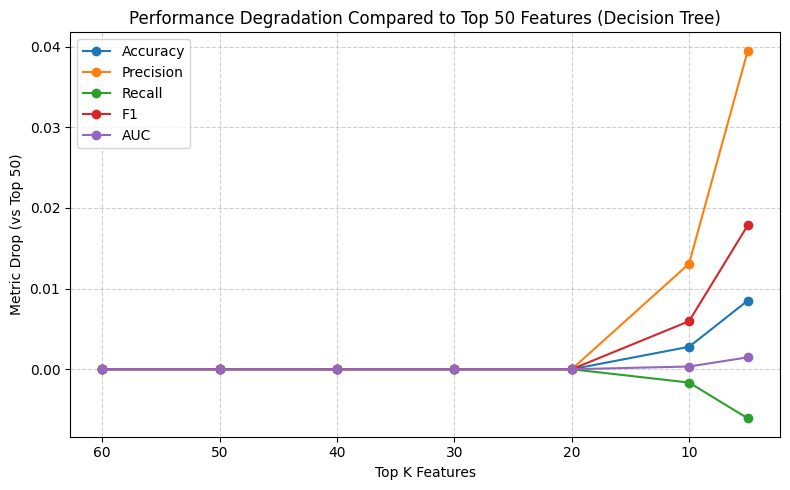

In [23]:
# decision tree
from sklearn.tree import DecisionTreeClassifier


def evaluate_model_with_top_features(top_k, shap_values, X_train_df, X_train_scaled, X_test_scaled, y_train, y_test):
   
    shap_array = np.abs(shap_values.values).mean(axis=0)

    feature_importance = pd.DataFrame({
        'feature': X_train_df.columns,
        'mean_abs_shap': shap_array
    }).sort_values(by='mean_abs_shap', ascending=False)

    top_features = feature_importance['feature'].head(top_k).tolist()
    indices = [X_train_df.columns.get_loc(f) for f in top_features]
    
    X_train_sub = X_train_scaled[:, indices]
    X_test_sub = X_test_scaled[:, indices]

    model = DecisionTreeClassifier(max_depth=7, min_samples_split=15, class_weight='balanced')
    model.fit(X_train_sub, y_train)

    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    return {
        'Top': top_k,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }

top_ks = [60,50,40,30,20, 10, 5]
results_dt = []

for k in top_ks:
    result = evaluate_model_with_top_features(
        top_k=k,
        shap_values=shap_values_xgb,  
        X_train_df=X_train_scaled_df,
        X_train_scaled=X_train_scaled,
        X_test_scaled=X_test_scaled,
        y_train=y_train,
        y_test=y_test
    )
    results_dt.append(result)

results_dt = pd.DataFrame(results_dt)

# calculate the difference from Top 50
baseline = results_dt[results_dt['Top'] == 50][metrics].values[0]
delta_df = results_dt.copy()
for metric in metrics:
    delta_df[metric] = baseline[metrics.index(metric)] - delta_df[metric]

plt.figure(figsize=(8, 5))
for metric in metrics:
    plt.plot(delta_df['Top'], delta_df[metric], marker='o', label=metric)

plt.xlabel('Top K Features')
plt.ylabel('Metric Drop (vs Top 50)')
plt.title('Performance Degradation Compared to Top 50 Features (Decision Tree)')
plt.gca().invert_xaxis()  
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


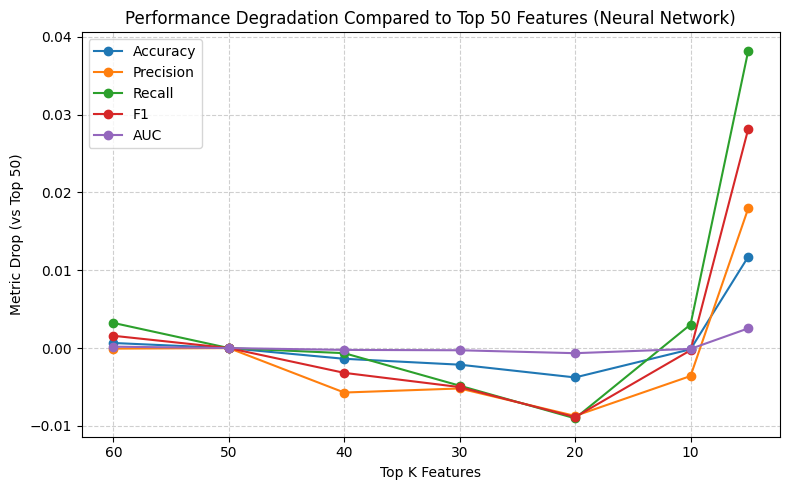

In [25]:
# neural network
from sklearn.neural_network import MLPClassifier

def evaluate_model_with_top_features(top_k, shap_values, X_train_df, X_train_scaled, X_test_scaled, y_train, y_test):
    
    shap_array = np.abs(shap_values.values).mean(axis=0)
    feature_importance = pd.DataFrame({
        'feature': X_train_df.columns,
        'mean_abs_shap': shap_array
    }).sort_values(by='mean_abs_shap', ascending=False)

    top_features = feature_importance['feature'].head(top_k).tolist()
    indices = [X_train_df.columns.get_loc(f) for f in top_features]
    
    X_train_sub = X_train_scaled[:, indices]
    X_test_sub = X_test_scaled[:, indices]

    model = MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=1000, random_state=42)

    model.fit(X_train_sub, y_train)

    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    return {
        'Top': top_k,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }

top_ks = [60,50,40,30,20, 10, 5]
results_nn = []

for k in top_ks:
    result = evaluate_model_with_top_features(
        top_k=k,
        shap_values=shap_values_xgb,  
        X_train_df=X_train_scaled_df,
        X_train_scaled=X_train_scaled,
        X_test_scaled=X_test_scaled,
        y_train=y_train,
        y_test=y_test
    )
    results_nn.append(result)

results_nn = pd.DataFrame(results_nn)

# calculate the difference from Top 50
baseline = results_nn[results_nn['Top'] == 50][metrics].values[0]
delta_df = results_nn.copy()
for metric in metrics:
    delta_df[metric] = baseline[metrics.index(metric)] - delta_df[metric]

plt.figure(figsize=(8, 5))
for metric in metrics:
    plt.plot(delta_df['Top'], delta_df[metric], marker='o', label=metric)

plt.xlabel('Top K Features')
plt.ylabel('Metric Drop (vs Top 50)')
plt.title('Performance Degradation Compared to Top 50 Features (Neural Network)')
plt.gca().invert_xaxis()  
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
